In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_excel('Liquidity-and-interbank-rate.xlsx',
                   sheet_name='LiquiditySeries',
                  skiprows=[0,1,3,4,5,2642]
                  )

In [3]:
df.head()

,Date (Nepali),Date (English),Balance at NRB minus CRR,Prime Rate,Secondary Rate,Overall Rate
0,2069-03-29,2012-07-13,73959.271,NaN,NaN,NaN
1,2069-04-05,2012-07-20,88835.736,NaN,NaN,NaN
2,2069-04-12,2012-07-27,82056.489,NaN,NaN,NaN
3,2069-04-26,2012-08-10,66216.424,NaN,NaN,NaN
4,2069-05-08,2012-08-24,50815.196,NaN,NaN,NaN


In [4]:
df.dtypes

Date (Nepali)                       object
Date (English)              datetime64[ns]
Balance at NRB minus CRR           float64
Prime Rate                          object
Secondary Rate                      object
Overall Rate                        object
dtype: object

In [5]:
df=df.drop(columns=['Date (Nepali)'])

In [6]:
df=df.rename(columns={"Date (English)":"Date"})

In [7]:
df.head()

,Date,Balance at NRB minus CRR,Prime Rate,Secondary Rate,Overall Rate
0,2012-07-13,73959.271,NaN,NaN,NaN
1,2012-07-20,88835.736,NaN,NaN,NaN
2,2012-07-27,82056.489,NaN,NaN,NaN
3,2012-08-10,66216.424,NaN,NaN,NaN
4,2012-08-24,50815.196,NaN,NaN,NaN


In [8]:
df.columns = df.columns.str.replace(' ', '_')

In [9]:
df.head()

,Date,Balance_at_NRB_minus_CRR,Prime_Rate,Secondary_Rate,Overall_Rate
0,2012-07-13,73959.271,NaN,NaN,NaN
1,2012-07-20,88835.736,NaN,NaN,NaN
2,2012-07-27,82056.489,NaN,NaN,NaN
3,2012-08-10,66216.424,NaN,NaN,NaN
4,2012-08-24,50815.196,NaN,NaN,NaN


In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df['Date']=df['Date'].dt.date

In [12]:
import matplotlib.pyplot as plt 

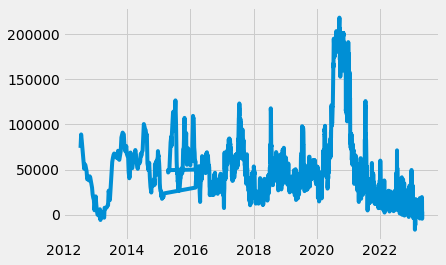

In [13]:
plt.plot(df['Date'],df['Balance_at_NRB_minus_CRR'])

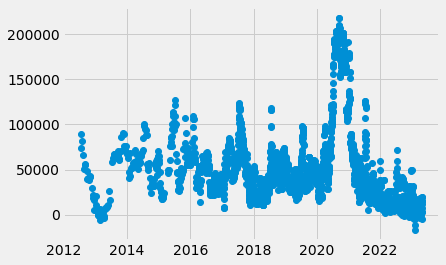

In [14]:
plt.plot_date(df['Date'],df['Balance_at_NRB_minus_CRR'])

In [15]:
df['Date']=pd.to_datetime(df['Date'])

In [16]:
filtered_df = df[df['Date'] > '2016-08-09']

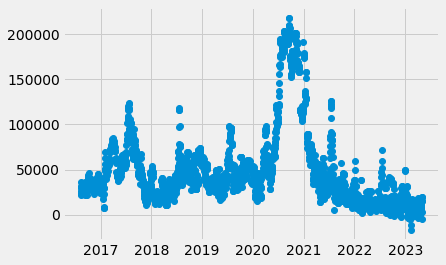

In [17]:
plt.plot_date(filtered_df['Date'],filtered_df['Balance_at_NRB_minus_CRR'])

In [18]:
filtered_df = filtered_df.set_index('Date')

In [19]:
filtered_df=filtered_df.drop(columns=['Prime_Rate', 'Secondary_Rate','Overall_Rate'])

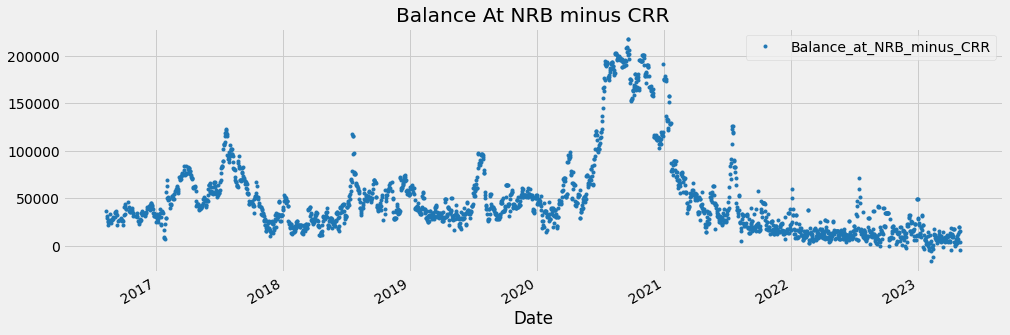

<Figure size 432x288 with 0 Axes>

In [20]:
filtered_df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Balance At NRB minus CRR')
plt.show()
plt.savefig("images/simple_trend.png")

In [21]:
cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)
filtered_df['date'] = filtered_df.index
filtered_df['dayofweek'] = filtered_df.index.dayofweek
filtered_df['weekday'] = filtered_df.index.day_name()
filtered_df['weekday'] = filtered_df['weekday'].astype(cat_type)
filtered_df['quarter'] = filtered_df.index.quarter
filtered_df['month'] = filtered_df.index.month
filtered_df['year'] = filtered_df.index.year
filtered_df['dayofyear'] = filtered_df.index.dayofyear
filtered_df['dayofmonth'] = filtered_df.index.day
filtered_df['weekofyear'] = filtered_df.index.isocalendar().week

In [22]:
filtered_df.head()

,Balance_at_NRB_minus_CRR,date,dayofweek,weekday,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,
2016-08-10,36101.290972,2016-08-10,2,Wednesday,3,8,2016,223,10,32
2016-08-11,31244.397186,2016-08-11,3,Thursday,3,8,2016,224,11,32
2016-08-13,29476.080942,2016-08-13,5,Saturday,3,8,2016,226,13,32
2016-08-14,21602.674977,2016-08-14,6,Sunday,3,8,2016,227,14,32
2016-08-15,24527.835281,2016-08-15,0,Monday,3,8,2016,228,15,33


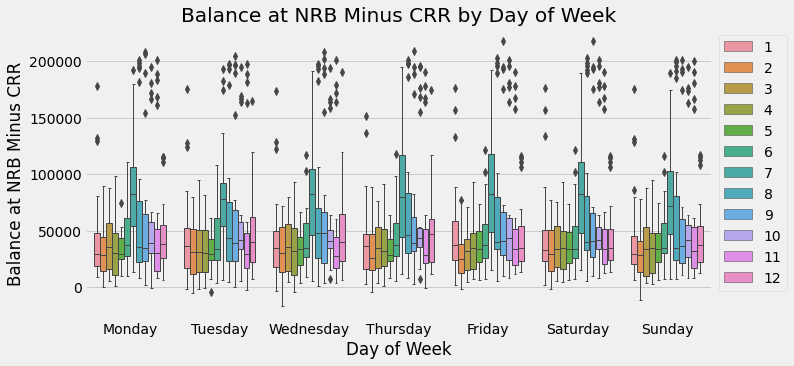

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=filtered_df.dropna(),
            x='weekday',
            y='Balance_at_NRB_minus_CRR',
            hue='month',
            ax=ax,
            linewidth=1)
ax.set_title('Balance at NRB Minus CRR by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Balance at NRB Minus CRR')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

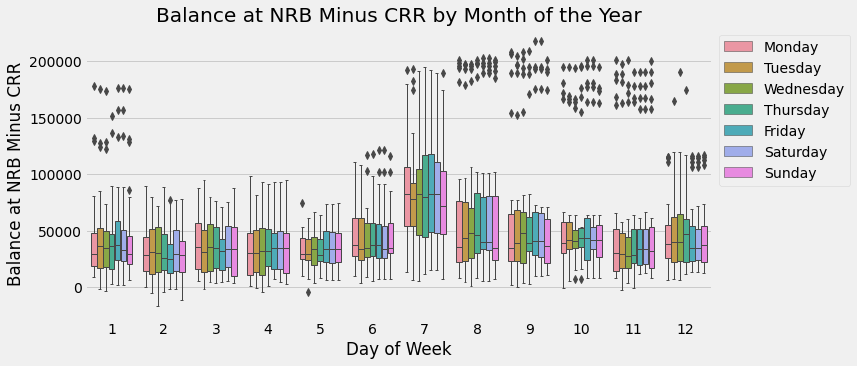

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=filtered_df.dropna(),
            x='month',
            y='Balance_at_NRB_minus_CRR',
            hue='weekday',
            ax=ax,
            linewidth=1)
ax.set_title('Balance at NRB Minus CRR by Month of the Year')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Balance at NRB Minus CRR')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [25]:
new_df = pd.DataFrame({'Date':filtered_df.index,'Balance_at_NRB_minus_CRR':filtered_df['Balance_at_NRB_minus_CRR']})

In [26]:
new_df.describe()

,Balance_at_NRB_minus_CRR
count,2361.000000
mean,49393.566999
std,44182.755968
min,-16650.709319
25%,21238.335078
50%,37173.501077
75%,58263.490957
max,218200.639531


Text(0, 0.5, 'Balance at NRB minus CRR')

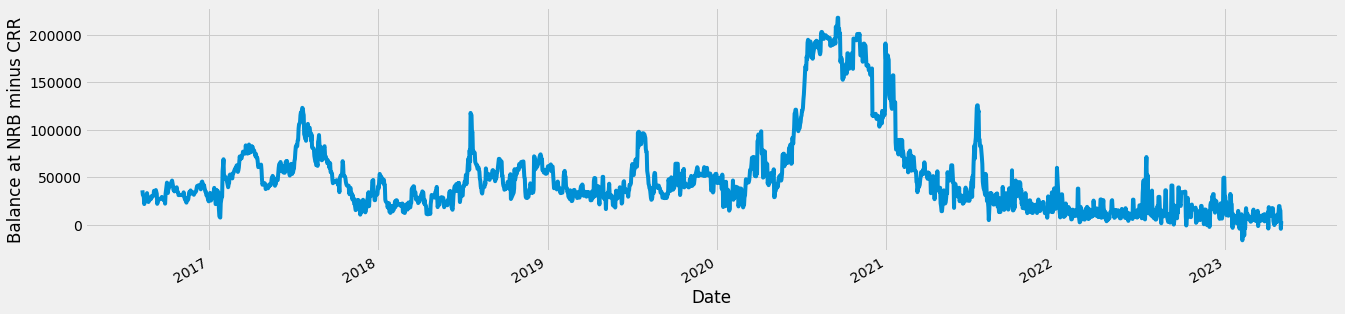

In [27]:
filtered_df['Balance_at_NRB_minus_CRR'].plot(figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Balance at NRB minus CRR')

In [28]:
new_df=new_df.set_index('Date')

In [29]:
result = seasonal_decompose(new_df['Balance_at_NRB_minus_CRR'], model='add',period=12)
# result.plot() 

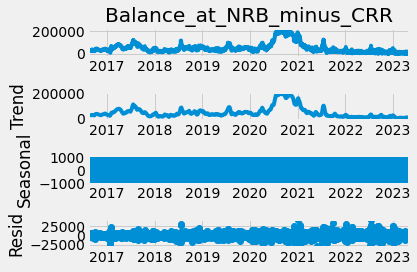

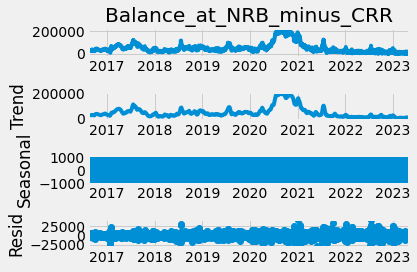

In [30]:
result.plot()

In [31]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true,y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [32]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [33]:
Augmented_Dickey_Fuller_Test_func(new_df['Balance_at_NRB_minus_CRR'],'Balance_at_NRB_minus_CRR')

Results of Dickey-Fuller Test for column: Balance_at_NRB_minus_CRR
Test Statistic                   -2.985414
p-value                           0.036279
No Lags Used                      4.000000
Number of Observations Used    2356.000000
Critical Value (1%)              -3.433129
Critical Value (5%)              -2.862768
Critical Value (10%)             -2.567423
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


In [34]:
X = new_df['Balance_at_NRB_minus_CRR']

In [35]:
train,test = X[0:-30],X[-30:]

In [36]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
                            d=None, trace=True,error_action='ignore',suppress_warnings=True,
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=48074.000, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=48129.332, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=48099.189, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=48096.539, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=48127.341, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=48074.192, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=48074.728, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=48093.575, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=48098.892, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=48069.918, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=48068.906, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=48068.939, Time=1.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=48068.798, Time=2.25 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=48066.245, Time=1.38 sec
 ARIMA(4,1,0)(0,0,0

In [37]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2331
Model:               SARIMAX(4, 1, 1)   Log Likelihood              -24025.544
Date:                Fri, 12 May 2023   AIC                          48063.089
Time:                        08:49:35   BIC                          48097.610
Sample:                             0   HQIC                         48075.667
                               - 2331                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8133      0.034     23.800      0.000       0.746       0.880
ar.L2          0.0705      0.021      3.329      0.001       0.029       0.112
ar.L3         -0.0714      0.022     -3.308      0.001      -0.114      -0.029
ar.L4          0.0809      0.018      4.550      0.000       0.046       0.116
ma.L1         -0.9439      0.031    -30.807      0.000      -1.004      -0.884
sigma2      5.324e+07   8.18e-10   6.51e+16      0.000    5.32e+07    5.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10138.35
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.02e+31. Standard errors may be unstable.
"""

In [38]:
forecast,conf_int = stepwise_model.predict(n_periods=len(test), 
                                           return_conf_int=True)

In [39]:
forecast = pd.DataFrame(forecast,columns=['Balance_pred'])
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(2332, 2362)
df_conf = df_conf.set_index("new_index")
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 65336807.77195663
MAE is : 6828.497329210901
RMSE is : 8083.11869094823
MAPE is : 109.81876689140866
R2 is : -0.4281662912245001



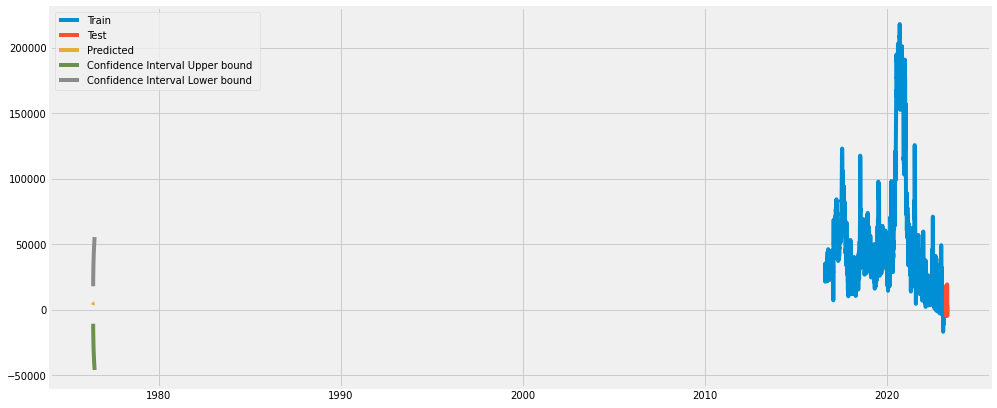

In [40]:
forecast["new_index"] = range(2332, 2362)
forecast = forecast.set_index("new_index")
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

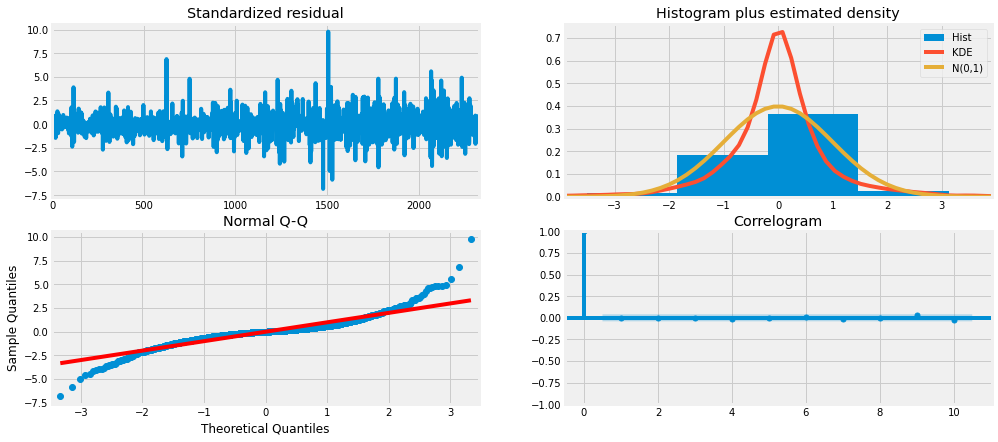

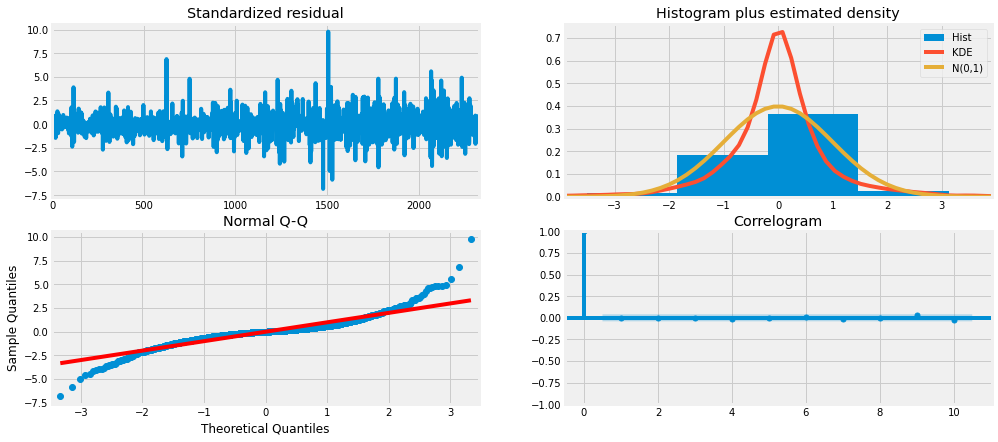

In [41]:
stepwise_model.plot_diagnostics()

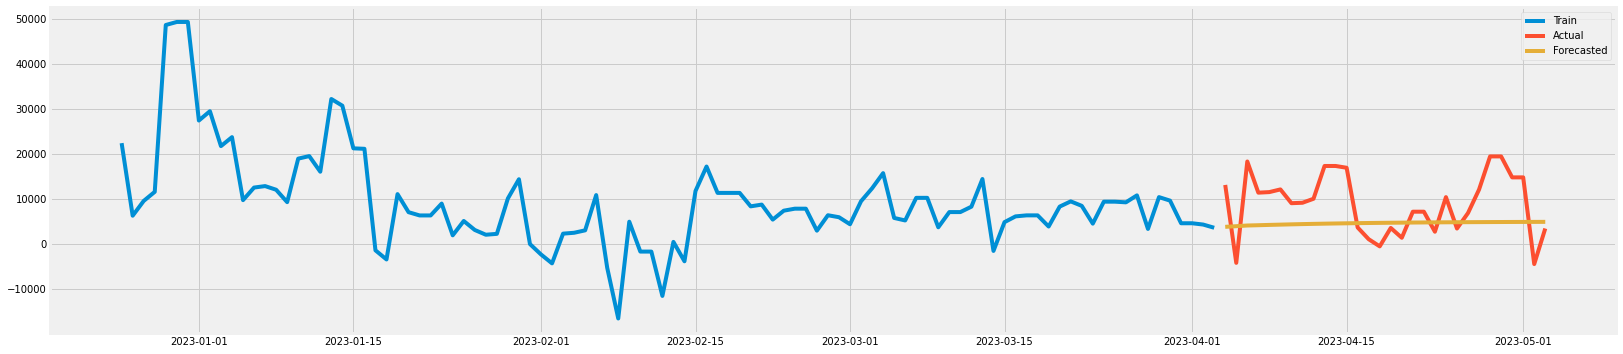

In [42]:
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(train.index[-100:], train.values[-100:], label='Train')
ax.plot(test.index, test.values, label='Actual')
ax.plot(test.index, forecast, label='Forecasted')
plt.legend()
plt.show()